# Dependency Installation

In [1]:
!pip install langchain_community -q
!pip install replicate -q
!pip install mplfinance -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.7 MB/s eta 0:00:00


# Import Library

In [2]:
# Import Libraries
import os # Import the Os Module for Interacting with the Operating System
import kagglehub # Import Kagglehub to Interact with the Kaggle Hub API
from google.colab import userdata # Import Userdata from Google.colab to Securely Access User Secrets and Data
from langchain_community.llms import Replicate # Import the Replicate Class from Langchain_community.llms to Connect with Large Language Models (LLMs) on Replicate
import mplfinance as mpf # Import Mplfinance for Creating Financial Visualizations Like Candlestick Charts

import pandas as pd # Import Pandas for Data Manipulation and Analysis, Primarily with DataFrames
import numpy as np # Import Numpy for Efficient Numerical Operations and Array Handling
import matplotlib.pyplot as plt # Import Matplotlib.pyplot for Creating a Wide Variety of Static, Interactive, and Animated Plots
import seaborn as sns # Import Seaborn for Creating More Attractive and Informative Statistical Graphics
sns.set(style="whitegrid") # Set the Default Style for Seaborn Plots to 'Whitegrid' for a Clean, Professional Look
from scipy import stats # Import the Stats Module from Scipy for a Collection of Statistical Functions

# 1. Setup Model's API

In [3]:
api_token = userdata.get('api_token') # Get the 'api_token' Value from Google Colab's Userdata
os.environ["REPLICATE_API_TOKEN"] = api_token # Set the Replicate API Token as an Environment Variable

model = "ibm-granite/granite-3.3-8b-instruct" # Define the Model to be Used from Replicate
output = Replicate( # Create an Instance of the Replicate Class
    model=model, # Set the Model to be Used
    replicate_api_token=api_token, # Pass the Replicate API Token for Authentication
)

# 2. Import Data

In [4]:
bni_stock_historical_price = kagglehub.dataset_download('caesarmario/bank-negara-indonesia-stock-historical-price') # Download the 'bank-negara-indonesia-stock-historical-price' Dataset from Kaggle Hub
print('Data source import complete.')

100%|██████████| 32.2k/32.2k [00:00<00:00, 14.5MB/s]

Extracting files...
Data source import complete.


In [5]:
csv_daily_path = os.path.join(bni_stock_historical_price, "BBNI.JK.csv") # Construct the Full File Path for the "BBNI.JK.csv" File

In [6]:
stock_df_daily = pd.read_csv(csv_daily_path) # Read the CSV File from the Specified Path into a Pandas DataFrame
stock_df_daily.head(10) # Display the First 10 Rows of the DataFrame to Verify the Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,4400.0,4400.0,4400.0,4400.0,3718.353760,0
1,2019-01-02,4400.0,4400.0,4337.5,4362.5,3686.663086,15681200
2,2019-01-03,4337.5,4387.5,4325.0,4362.5,3686.663086,21416600
3,2019-01-04,4362.5,4400.0,4337.5,4362.5,3686.663086,41078600
4,2019-01-07,4412.5,4462.5,4412.5,4437.5,3750.043945,48108200
5,2019-01-08,4437.5,4475.0,4400.0,4450.0,3760.607910,45945800
6,2019-01-09,4475.0,4475.0,4412.5,4425.0,3739.480957,50484000
7,2019-01-10,4462.5,4462.5,4400.0,4425.0,3739.480957,44421400
8,2019-01-11,4475.0,4487.5,4450.0,4462.5,3771.171631,47217000
9,2019-01-14,4487.5,4487.5,4425.0,4437.5,3750.043945,26702800


# 3. Exploratory Data Analysis (EDA)

## 3.1. Data Understanding

In [7]:
stock_df_daily.shape # Display the Shape of the DataFrame (Rows, Columns)

(1499, 7)

In [8]:
stock_df_daily.columns # Display the Names of all Columns in the DataFrame

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
stock_df_daily.info() # Print a Concise Summary of the DataFrame, Including Data Types and Non-null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1499 non-null   object 
 1   Open       1499 non-null   float64
 2   High       1499 non-null   float64
 3   Low        1499 non-null   float64
 4   Close      1499 non-null   float64
 5   Adj Close  1499 non-null   float64
 6   Volume     1499 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.1+ KB


In [10]:
stock_df_daily.describe() # Generate Descriptive Statistics of the Numerical Columns in the DataFrame

,Open,High,Low,Close,Adj Close,Volume
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1.499000e+03
mean,4004.182789,4050.225150,3951.857905,3999.514676,3685.549812,6.544118e+07
std,1002.940095,1007.146685,998.152361,1002.784813,1040.475987,4.907365e+07
min,1580.000000,1705.000000,1485.000000,1580.000000,1408.581421,0.000000e+00
25%,3262.500000,3300.000000,3218.750000,3250.000000,2897.398682,3.595320e+07
50%,4250.000000,4300.000000,4200.000000,4250.000000,3753.387207,5.132460e+07
75%,4675.000000,4725.000000,4630.000000,4675.000000,4368.797363,7.889305e+07
max,6225.000000,6250.000000,6100.000000,6225.000000,5950.000000,4.440854e+08


## 3.2. Missing & Duplicated Values Identification

In [11]:
stock_df_daily.isnull().sum() # Calculate and Display the Number of Missing Values for Each Column

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [12]:
print("Total data yang terduplikasi : ", stock_df_daily.duplicated().sum()) # Print the Total Number of Duplicate Rows in the DataFrame

Total data yang terduplikasi :  0


## 3.3. Distribution Analysis

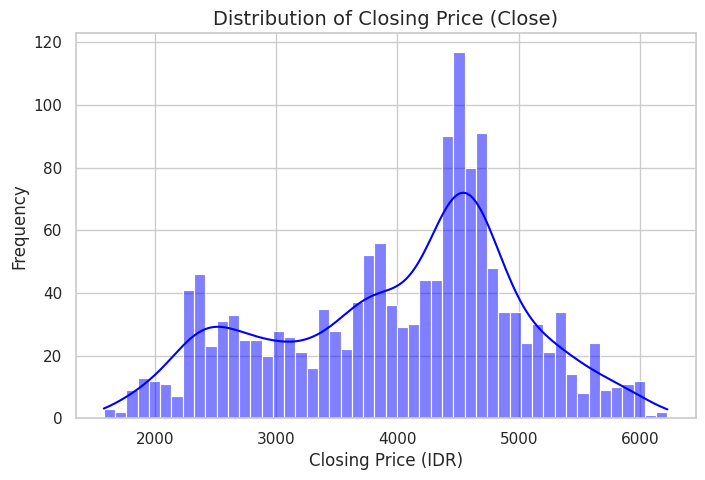

In [13]:
plt.figure(figsize=(8, 5)) # Create a Figure for the Plot with a Specified Size
sns.histplot(stock_df_daily['Close'], bins=50, kde=True, color='blue') # Create a Histogram of the 'Close' Price, with 50 Bins, a KDE Plot, and a Blue Color
plt.title("Distribution of Closing Price (Close)", fontsize=14) # Set the Title of the Plot with a Specified Font Size
plt.xlabel("Closing Price (IDR)") # Set the Label for the X-axis
plt.ylabel("Frequency") # Set the Label for the Y-axis
plt.show() # Display the Final Plot

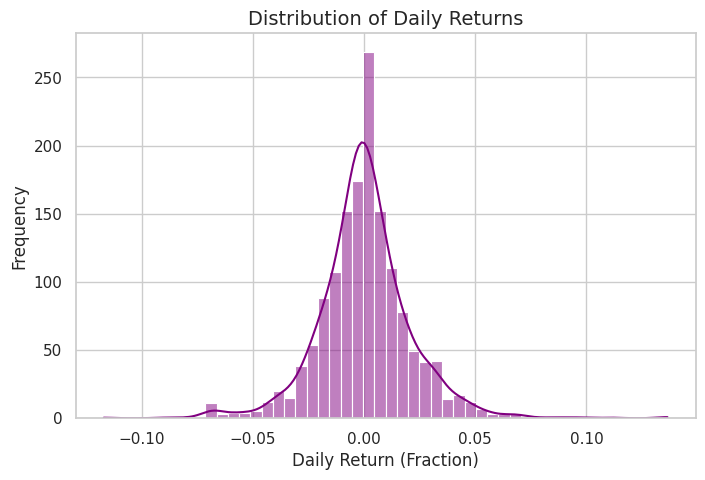

In [14]:
stock_df_daily['Daily Return'] = stock_df_daily['Close'].pct_change() # Calculate the Daily Percentage Change of the 'Close' Price and Store it in a New Column

plt.figure(figsize=(8, 5)) # Create a Figure for the Plot with a Specified Size
sns.histplot(stock_df_daily['Daily Return'].dropna(), bins=50, kde=True, color='purple') # Create a Histogram of 'Daily Return' Data, with 50 Bins, a KDE Plot, and a Purple Color
plt.title("Distribution of Daily Returns", fontsize=14) # Set the Title of the Plot with a Specified Font Size
plt.xlabel("Daily Return (Fraction)") # Set the Label for the X-axis
plt.ylabel("Frequency") # Set the Label for the Y-axis
plt.show() # Display the Final Plot

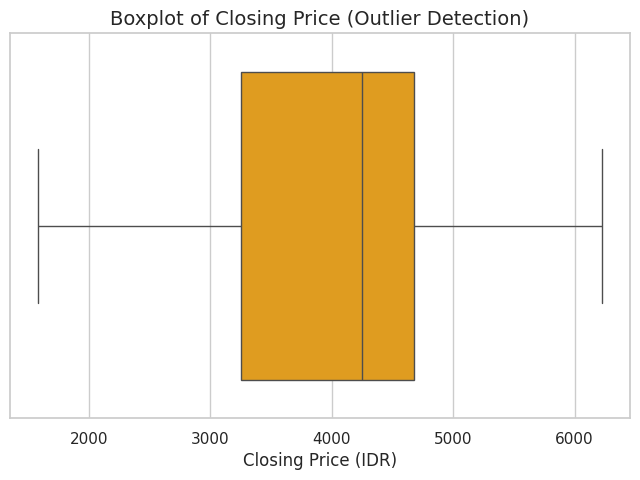

In [15]:
plt.figure(figsize=(8, 5)) # Create a Figure for the Plot with a Specified Size
sns.boxplot(x=stock_df_daily['Close'], color='orange') # Create a Box Plot to Visualize the Distribution of 'Close' Price and Identify Outliers
plt.title("Boxplot of Closing Price (Outlier Detection)", fontsize=14) # Set the Title of the Plot with a Specified Font Size
plt.xlabel("Closing Price (IDR)") # Set the Label for the X-axis
plt.show() # Display the Final Plot

# 4. Data Preprocessing

## 4.1. Data Formating Adjusment

In [16]:
stock_df_daily['Date'] = pd.to_datetime(stock_df_daily['Date']) # Convert the 'Date' Column to Datetime Objects
stock_df_daily = stock_df_daily.sort_values(by='Date').reset_index(drop=True) # Sort the DataFrame by 'Date' and Reset the Index

## 4.2. Feature Engineering for Analytics

In [17]:
stock_df_daily['Daily Return'] = stock_df_daily['Close'].pct_change() # Calculate the Daily Percentage Change for the 'Close' Price
stock_df_daily['Log Return'] = np.log(stock_df_daily['Close'] / stock_df_daily['Close'].shift(1)) # Calculate the Daily Logarithmic Return for the 'Close' Price

In [18]:
stock_df_daily['Year'] = stock_df_daily['Date'].dt.year # Extract the Year from the 'Date' Column
stock_df_daily['Month'] = stock_df_daily['Date'].dt.month # Extract the Month from the 'Date' Column
stock_df_daily['Day'] = stock_df_daily['Date'].dt.day # Extract the Day from the 'Date' Column

## 4.3. Data Range Alignment

In [19]:
stock_df_daily = stock_df_daily.set_index('Date') # Set the 'Date' Column as the DataFrame's Index
stock_df_daily = stock_df_daily.asfreq('B').ffill() # Resample the DataFrame to Business Days and Forward-fill Missing Values

In [20]:
stock_df_daily.shape # Display the Shape of the Resampled DataFrame

(1600, 11)

# 5. Analytics, Insight & Findings

In [21]:
# Initialize an Empty DataFrame to Store Insights and Findings
insight_findings_df = pd.DataFrame(columns=["No.", "Insight & Findings", "Evidence", "Relevance"])

# Define a Function to Add a New Insight to the DataFrame
def add_insight(insight_text, evidence_text, relevance_text):
    # Declare the DataFrame as a Global Variable to be Modified inside the Function
    global insight_findings_df

    # Create a Dictionary for the New Row
    new_row = {
        "No.": len(insight_findings_df) + 1,# Assign a Sequential Number
        "Insight & Findings": insight_text,# Add the Insight Text
        "Evidence": evidence_text,# Add the Evidence Text
        "Relevance": relevance_text# Add the Relevance Text
    }

    # Append the New Row to the DataFrame and Ignore the Old Index
    insight_findings_df = pd.concat([insight_findings_df, pd.DataFrame([new_row])], ignore_index=True)

## 5.1. Trend Analysis (Close + SMA20 & SMA50)

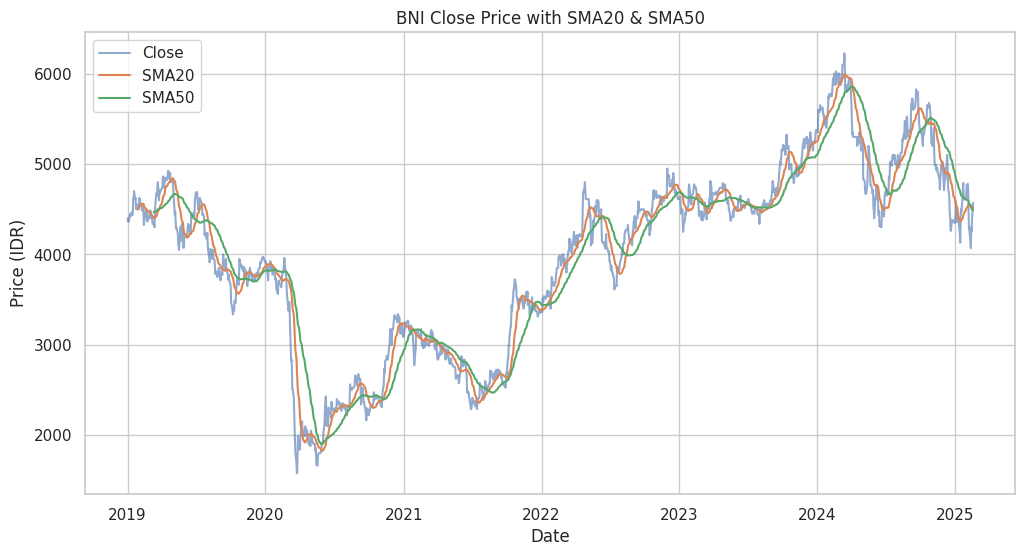

In [22]:
# Define a Function to Plot the Stock Trend
def plot_trend(df):

    plt.figure(figsize=(12,6))# Create a Figure and an Axes with a Specified Size
    plt.plot(df.index, df['Close'], label='Close', alpha=0.6)# Plot the Closing Price with a Label and Transparency

    if 'SMA20' not in df.columns:# Check if the 20-day Simple Moving Average Exists
        df['SMA20'] = df['Close'].rolling(20).mean()# Calculate the 20-day SMA

    if 'SMA50' not in df.columns:# Check if the 50-day Simple Moving Average Exists
        df['SMA50'] = df['Close'].rolling(50).mean()# Calculate the 50-day SMA

    plt.plot(df.index, df['SMA20'], label='SMA20')# Plot the 20-day SMA
    plt.plot(df.index, df['SMA50'], label='SMA50')# Plot the 50-day SMA
    plt.title('BNI Close Price with SMA20 & SMA50')# Set the Plot Title
    plt.xlabel('Date')# Set the X-axis Label
    plt.ylabel('Price (IDR)')# Set the Y-axis Label
    plt.legend()# Display the Plot Legend
    plt.show()# Show the Generated Plot

# Call the Function with the Daily Stock DataFrame
plot_trend(stock_df_daily)

### Insight & Findings

1. Findings
  *   Sharp decline in March 2020: from around ±4,000 IDR to ±1,800 IDR.
  *   A golden cross occurred in early 2021 when the SMA20 crossed the SMA50 from below, followed by an uptrend reaching ±5,000 IDR in mid-2023.
  *   A death cross was seen in mid-2024 when the SMA20 crossed the SMA50 from above, followed by a decline from ±6,000 IDR to ±4,200 IDR in early 2025.
  *   The SMA20 and SMA50 tended to be close together during sideways periods (early 2022–2023), indicating relative price stability.

2. Insight

  Significant fluctuations in BNI's stock price are visible from 2019 to early 2025, with three major periods of significant uptrends: early 2021–mid-2023, mid-2023–early 2024, and a sharp increase in early 2024 before a decline occurred. The March–April 2020 period shows a sharp decline, likely related to the initial impact of the COVID-19 pandemic. The SMA20 and SMA50 patterns show several instances of golden crosses and death crosses, which signal potential medium-term trend changes.

3. Relevance

  This insight is relevant for medium- and long-term stock investors who use moving average indicators to decide on buying and selling timing. Furthermore, market analysts can use these patterns to study the impact of macroeconomic events (like the pandemic) on BNI's stock price. Technical traders can also leverage the clearly visible golden cross and death cross signals.

In [23]:
add_insight(
    "Significant fluctuations in BNI's stock price are visible from 2019 to early 2025, with three major periods of significant uptrends: early 2021–mid-2023, mid-2023–early 2024, and a sharp increase in early 2024 before a decline occurred. The March–April 2020 period shows a sharp decline, likely related to the initial impact of the COVID-19 pandemic. The SMA20 and SMA50 patterns show several instances of golden crosses and death crosses, which signal potential medium-term trend changes.",
    "Sharp decline in March 2020: from around ±4,000 IDR to ±1,800 IDR. A golden cross occurred in early 2021 when the SMA20 crossed the SMA50 from below, followed by an uptrend reaching ±5,000 IDR in mid-2023. A death cross was seen in mid-2024 when the SMA20 crossed the SMA50 from above, followed by a decline from ±6,000 IDR to ±4,200 IDR in early 2025. The SMA20 and SMA50 tended to be close together during sideways periods (early 2022–2023), indicating relative price stability.",
    "This insight is relevant for medium- and long-term stock investors who use moving average indicators to decide on buying and selling timing. Furthermore, market analysts can use these patterns to study the impact of macroeconomic events (like the pandemic) on BNI's stock price. Technical traders can also leverage the clearly visible golden cross and death cross signals."
)

## 5.2. Volatility & Performance Metrics

In [24]:
def Compute_Performance_Metrics(df): # Defines a Function to Calculate Various Performance Metrics from a Stock Price DataFrame
    metrics = {} # Initializes an Empty Dictionary to Store the Calculated Metric Results
    if 'Daily Return' not in df.columns: # Checks if the 'Daily Return' Column Does Not Already Exist in the DataFrame
        df['Daily Return'] = df['Close'].pct_change() # If it Doesn't Exist, Calculate and Add the 'Daily Return' Column Based on the Daily Percentage Change of the Closing Price
    dr = df['Daily Return'].dropna() # Creates a New Series Containing 'Daily Return' by Removing NaN Values (Usually in the First Row)

    metrics['daily_volatility'] = float(dr.std()) # Calculates the Daily Volatility from the Standard Deviation of Daily Returns
    metrics['daily_volatility_pct'] = metrics['daily_volatility'] * 100 # Converts the Daily Volatility Value into a Percentage Format

    metrics['annualized_volatility'] = float(dr.std() * np.sqrt(252)) # Calculates Annualized Volatility by Multiplying Daily Volatility by the Square Root of 252 (the Approximate Number of Trading Days in a Year)
    metrics['annualized_volatility_pct'] = metrics['annualized_volatility'] * 100 # Converts the Annualized Volatility Value into a Percentage Format

    first = df['Close'].iloc[0] # Retrieves the First Closing Price Value from the DataFrame
    last = df['Close'].iloc[-1] # Retrieves the Last Closing Price Value from the DataFrame
    metrics['total_return'] = float(last / first - 1) # Calculates the Total Return over the Entire Period
    metrics['total_return_pct'] = metrics['total_return'] * 100 # Converts the Total Return Value into a Percentage Format

    metrics['cumulative_return_series'] = (1 + dr).cumprod() # Calculates the Cumulative Return over Time to Visualize Investment Growth

    num_years = (df.index[-1] - df.index[0]).days / 365.25 # Calculates the Number of Years in the Data, Accounting for Leap Years
    metrics['annualized_return'] = float((last / first) ** (1 / num_years) - 1) # Calculates the Annualized Return (CAGR - Compound Annual Growth Rate)
    metrics['annualized_return_pct'] = metrics['annualized_return'] * 100 # Converts the Annualized Return Value into a Percentage Format

    cumulative = (1 + dr).cumprod() # Recalculates the Cumulative Return for Drawdown Analysis
    rolling_max = cumulative.cummax() # Finds the Peak Value of the Cumulative Return at Each Point in Time
    drawdown = (cumulative - rolling_max) / rolling_max # Calculates the Drawdown, which is the Decline from the Previous Peak
    metrics['max_drawdown'] = float(drawdown.min()) # Finds the Maximum Drawdown During the Period
    metrics['max_drawdown_pct'] = metrics['max_drawdown'] * 100 # Converts the Max Drawdown Value into a Percentage Format

    dd_end = (drawdown == 0) # Identifies the Point where a Drawdown Period Ends (When the Return Hits a New Peak)
    dd_durations = (drawdown != 0).astype(int).groupby((drawdown == 0).cumsum()).sum() # Calculates the Duration of Each Individual Drawdown Period
    metrics['longest_drawdown_days'] = int(dd_durations.max()) if not dd_durations.empty else 0 # Determines the Longest Drawdown Duration in Days

    metrics['skewness'] = float(stats.skew(dr)) # Calculates the Skewness of Daily Returns to Measure the Asymmetry of the Return Distribution
    metrics['kurtosis'] = float(stats.kurtosis(dr)) # Calculates the Kurtosis of Daily Returns to Measure the "Tailedness" of the Return Distribution

    return metrics # Returns the Dictionary Containing All the Calculated Performance Metrics

metrics = Compute_Performance_Metrics(stock_df_daily) # Calls the Function to Calculate Metrics from the 'stock_df_daily' DataFrame
print("Performance Metrics") # Prints a Header for the Output
for k, v in metrics.items(): # Iterates through Each Key-Value Pair in the Metrics Dictionary
    if k.endswith("_pct") and isinstance(v, float): # Checks if the Key Ends with "_pct" and its Value is a Float
        print(f"{k}: {v:.2f}%")
    elif k == "longest_drawdown_days": # If the Key is "longest_drawdown_days"
        print(f"{k}: {v} hari")

Performance Metrics
daily_volatility_pct: 2.11%
annualized_volatility_pct: 33.55%
total_return_pct: 3.86%
annualized_return_pct: 0.62%
max_drawdown_pct: -69.71%
longest_drawdown_days: 786 hari


### Insight & Findings

1. Findings
  *   Daily volatility: 2.11% → indicates that the daily price can fluctuate by an average of ±2%.
  *   Annualized volatility: 33.55% → a high level of annual volatility.
  *   Total return: 3.86% → cumulative profit is relatively small compared to the risk taken.
  *   Annualized return: 0.62% → the average annual growth is very low.
  *   Max drawdown: -69.71% → the largest price decline was almost 70% from its peak.
  *   Longest drawdown: 786 days → it took a very long time to recover to the previous peak.


2. Insight

  Although the total return during the analysis period was a positive 3.86%, the annualized return was only 0.62%, indicating relatively stagnant long-term price growth. The annualized volatility is quite high at 33.55%, which means BNI's stock price experienced significant fluctuations from year to year. Significant risks are evident from the max drawdown of -69.71%, and the longest recovery period (longest drawdown) reached 786 days, which is equivalent to more than 2 years.

3. Relevance

  This data is important for investors who consider the risk-return ratio. The high volatility and drawdown show that BNI stock has significant market risk, making risk management strategies such as stop loss, hedging, or portfolio diversification essential. For long-term investors, the low annualized return figure can be a consideration for evaluating whether this stock is worth holding without an active strategy.

In [25]:
add_insight(
    "Although the total return during the analysis period was a positive 3.86%, the annualized return was only 0.62%, indicating relatively stagnant long-term price growth. The annualized volatility is quite high at 33.55%, which means BNI's stock price experienced significant fluctuations from year to year. Significant risks are evident from the max drawdown of -69.71%, and the longest recovery period (longest drawdown) reached 786 days, which is equivalent to more than 2 years.",
    "Daily volatility: 2.11% → indicates that the daily price can fluctuate by an average of ±2%. Annualized volatility: 33.55% → a high level of annual volatility. Total return: 3.86% → cumulative profit is relatively small compared to the risk taken. Annualized return: 0.62% → the average annual growth is very low. Max drawdown: -69.71% → the largest price decline was almost 70% from its peak. Longest drawdown: 786 days → it took a very long time to recover to the previous peak.",
    "This data is important for investors who consider the risk-return ratio. The high volatility and drawdown show that BNI stock has significant market risk, making risk management strategies such as stop loss, hedging, or portfolio diversification essential. For long-term investors, the low annualized return figure can be a consideration for evaluating whether this stock is worth holding without an active strategy."
)

## 5.3. Rolling Volatility Plot

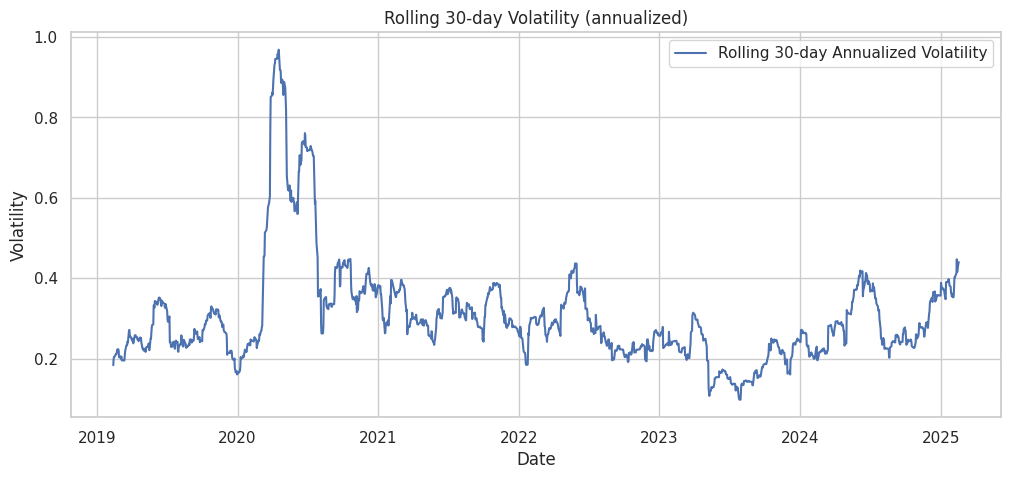

In [26]:
def plot_rolling_volatility(df, window=30): # Define a Function to Plot Rolling Volatility, Taking a DataFrame and a Window Size as Inputs
    if 'Daily Return' not in df.columns: # Check if the 'Daily Return' Column Exists in the DataFrame
        df['Daily Return'] = df['Close'].pct_change() # Calculate the Daily Percentage Change of 'Close' Price if the Column Does Not Exist
    rolling_vol = df['Daily Return'].rolling(window).std() * np.sqrt(252) # Calculate the Rolling Standard Deviation of Daily Returns and Annualize It
    plt.figure(figsize=(12,5)) # Create a New Figure for the Plot with a Specified Size
    plt.plot(rolling_vol.index, rolling_vol, label=f'Rolling {window}-day Annualized Volatility') # Plot the Rolling Volatility Over Time
    plt.title(f'Rolling {window}-day Volatility (annualized)') # Set the Title of the Plot
    plt.xlabel('Date') # Set the X-axis Label as 'Date'
    plt.ylabel('Volatility') # Set the Y-axis Label as 'Volatility'
    plt.legend() # Display the Legend for the Plot
    plt.show() # Show the Final Plot

plot_rolling_volatility(stock_df_daily, window=30) # Call the Function to Plot the 30-Day Rolling Volatility for the 'stock_df_daily' DataFrame

### Insight & Findings

1. Findings
  *   The highest peak of the 30-day annualized rolling volatility approached 1.0 (100%) in early 2020.
  *   A period of relative stability was seen from 2021 to 2023, with a range of 0.2–0.4 (20–40%).
  *   A gradual increase towards 0.4+ (40%+) occurred from mid-2024 to early 2025.

2. Insight

  A very sharp surge in volatility is visible in March–April 2020, reaching nearly 100% (annualized), which coincided with the beginning of the COVID-19 pandemic and global market turmoil. Afterward, volatility tended to decrease but remained at a moderate level (20–40%) throughout 2021–2023. Towards the end of 2024 to early 2025, the volatility trend increased again, indicating a greater potential for market uncertainty.

3. Relevance

  This information is important for short- and medium-term traders to adjust their position sizes and risk management strategies. A surge in volatility is often associated with higher profit opportunities, but also greater risk of loss. Institutional investors can use this data to assess the timing of hedging or asset diversification.

In [27]:
add_insight(
    "A very sharp surge in volatility is visible in March–April 2020, reaching nearly 100% (annualized), which coincided with the beginning of the COVID-19 pandemic and global market turmoil. Afterward, volatility tended to decrease but remained at a moderate level (20–40%) throughout 2021–2023. Towards the end of 2024 to early 2025, the volatility trend increased again, indicating a greater potential for market uncertainty.",
    "The highest peak of the 30-day annualized rolling volatility approached 1.0 (100%) in early 2020. A period of relative stability was seen from 2021 to 2023, with a range of 0.2–0.4 (20–40%). A gradual increase towards 0.4+ (40%+) occurred from mid-2024 to early 2025.",
    "This information is important for short- and medium-term traders to adjust their position sizes and risk management strategies. A surge in volatility is often associated with higher profit opportunities, but also greater risk of loss. Institutional investors can use this data to assess the timing of hedging or asset diversification."
)

## 5.4. Monthly & Yearly Returns Table + Heatmap

In [28]:
def monthly_returns_pivot(df): # Define a Function to Calculate Monthly Returns and Create a Pivot Table
    if 'Daily Return' not in df.columns: # Check if the 'Daily Return' Column Exists in the DataFrame
        df['Daily Return'] = df['Close'].pct_change() # Calculate the Daily Percentage Change for the 'Close' Price
    monthly = df['Close'].resample('ME').last().pct_change() # Resample the 'Close' Price to Month-End and Calculate the Percentage Change
    monthly_df = monthly.to_frame(name='Monthly Return') # Convert the Monthly Returns Series to a DataFrame
    monthly_df['Year'] = monthly_df.index.year # Extract the Year from the Index and Store it in a New Column
    monthly_df['Month'] = monthly_df.index.month # Extract the Month from the Index and Store it in a New Column
    pivot = monthly_df.reset_index().pivot(index='Year', columns='Month', values='Monthly Return') # Create a Pivot Table with 'Year' as Rows, 'Month' as Columns, and 'Monthly Return' as Values
    return pivot # Return the Final Pivot Table

monthly_pivot = monthly_returns_pivot(stock_df_daily) # Call the Function to Create a Monthly Returns Pivot Table
print("Monthly returns pivot (rows=Year, cols=Month):") # Print a Descriptive Header for the Output
display(monthly_pivot.round(4)) # Display the Pivot Table, Rounding the Values to 4 Decimal Places

Monthly returns pivot (rows=Year, cols=Month):


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,NaN,-0.0303,0.0682,0.0213,-0.1250,0.0952,-0.0788,-0.0914,-0.0455,0.0442,-0.0228,0.0467
2020,-0.0828,-0.0243,-0.4562,0.0733,-0.0659,0.1958,0.0044,0.1087,-0.1294,0.0676,0.2658,0.0292
2021,-0.1012,0.0721,-0.0378,-0.0044,-0.0526,-0.1426,0.0324,0.1297,-0.0046,0.3023,-0.0286,-0.0074
2022,0.0852,0.0922,0.0312,0.1182,-0.0054,-0.1444,0.0000,0.0860,0.0528,0.0474,0.0532,-0.0682
2023,-0.0081,-0.0410,0.0655,0.0080,-0.0398,0.0110,-0.0301,0.0338,0.1253,-0.0722,0.1013,0.0190
2024,0.0698,0.0435,-0.0167,-0.1102,-0.1619,0.0591,0.0665,0.0765,0.0000,-0.0187,-0.0514,-0.1265
2025,0.0966,-0.0419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


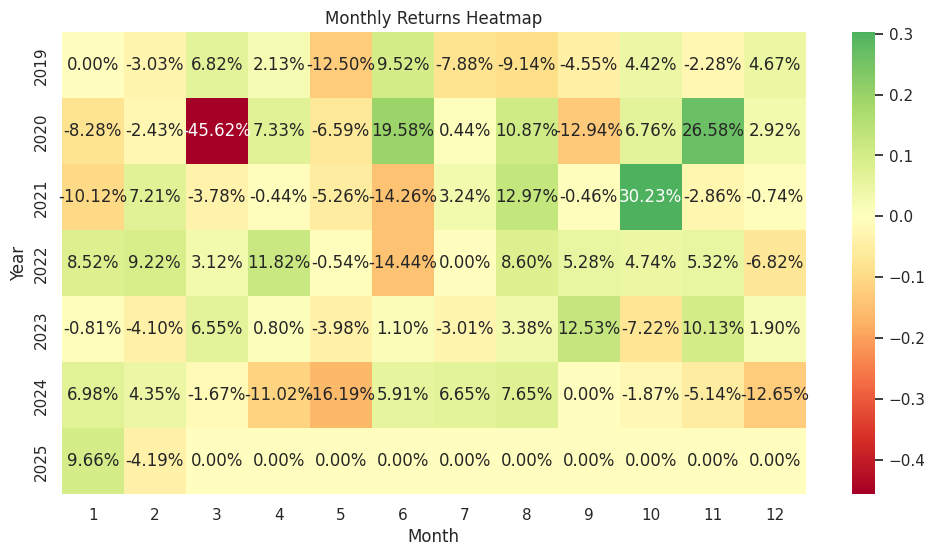

In [29]:
# Heatmap
plt.figure(figsize=(12,6)) # Create a Figure and a Set of Axes for the Plot with a Specified Size
sns.heatmap(monthly_pivot.fillna(0), annot=True, fmt=".2%", cmap="RdYlGn", center=0) # Create a Heatmap from the 'monthly_pivot' Data, Filling NaN Values with 0
plt.title("Monthly Returns Heatmap") # Set the Title of the Heatmap to 'Monthly Returns Heatmap'
plt.show() # Display the Final Plot

### Insight & Findings

1. Findings
  *   March 2020: -45.62% → the largest decline in the dataset.
  *   October 2021: +30.23% → the largest monthly increase.
  *   January is often positive: 8.52% (2022), 6.98% (2024), 9.66% (2025).
  *   December was negative in 2022 (-6.82%) and 2024 (-12.65%).
  *   May was negative in 2019 (-12.50%), 2021 (-5.26%), and 2024 (-16.19%).
  
2. Insight

  The analysis shows a pattern of monthly fluctuations that vary significantly from year to year, with some months displaying extreme price movements. A significant example is March 2020, which recorded a sharp decline of -45.62%, coinciding with the start of the COVID-19 pandemic. Conversely, October 2021 showed a price surge of +30.23%. Seasonally, January and February tend to register positive performance more often, while May and December have a negative tendency in some years.

3. Relevance

  This pattern can be used by seasonal traders to anticipate periods of high volatility or specific trend tendencies. Short-term investors can avoid historically loss-prone periods and maximize opportunities in consistently positive months. Risk analysts can also use this data to prepare hedging strategies for months with a history of poor performance.

In [30]:
add_insight(
    "The analysis shows a pattern of monthly fluctuations that vary significantly from year to year, with some months displaying extreme price movements. A significant example is March 2020, which recorded a sharp decline of -45.62%, coinciding with the start of the COVID-19 pandemic. Conversely, October 2021 showed a price surge of +30.23%. Seasonally, January and February tend to register positive performance more often, while May and December have a negative tendency in some years.",
    "March 2020: -45.62% → the largest decline in the dataset. October 2021: +30.23% → the largest monthly increase. January is often positive: 8.52% (2022), 6.98% (2024), 9.66% (2025). December was negative in 2022 (-6.82%) and 2024 (-12.65%). May was negative in 2019 (-12.50%), 2021 (-5.26%), and 2024 (-16.19%).",
    "This pattern can be used by seasonal traders to anticipate periods of high volatility or specific trend tendencies. Short-term investors can avoid historically loss-prone periods and maximize opportunities in consistently positive months. Risk analysts can also use this data to prepare hedging strategies for months with a history of poor performance."
)

## 5.5. Max/Min Month & Year Results

In [31]:
def top_bottom_periods(df, freq='ME', top_n=5): # Define a Function to Find the Top and Bottom Performing Periods
    s = df['Close'].resample(freq).last().pct_change().dropna() # Resample the 'Close' Price, Calculate the Percentage Change, and Drop Missing Values
    top = s.sort_values(ascending=False).head(top_n) # Sort the Returns in Descending Order and Get the Top N Periods
    bottom = s.sort_values(ascending=True).head(top_n) # Sort the Returns in Ascending Order and Get the Bottom N Periods
    return top, bottom # Return the Top and Bottom Periods

top_months, bottom_months = top_bottom_periods(stock_df_daily, freq='ME', top_n=3) # Call the Function to Find the Top and Bottom 3 Months of Returns
print("Top months by return:") # Print a Descriptive Header for the Top Months
print(top_months) # Display the Top Months by Return
print("\nBottom months by return:") # Print a Descriptive Header for the Bottom Months
print(bottom_months) # Display the Bottom Months by Return

Top months by return:
Date
2021-10-31    0.302326
2020-11-30    0.265823
2020-06-30    0.195822
Name: Close, dtype: float64

Bottom months by return:
Date
2020-03-31   -0.456228
2024-05-31   -0.161905
2022-06-30   -0.144414
Name: Close, dtype: float64


### Insight & Findings

1. Findings

  *   Top months: October 2021: +30.23%; November 2020: +26.58%; June 2020: +19.58%
  *   Bottom months: March 2020: -45.62%; May 2024: -16.19%; June 2022: -14.44%

2. Insight

  The data shows the top three best and worst months in terms of monthly returns. October 2021 recorded the highest performance at +30.23%, followed by November 2020 (+26.58%) and June 2020 (+19.58%). Conversely, March 2020 recorded the largest monthly decline at -45.62%, followed by May 2024 (-16.19%) and June 2022 (-14.44%). These results show that the early period of the COVID-19 pandemic featured extreme price movements, both declines and surges.

3. Relevance

  This information can help traders and investors identify historical periods with extreme performance that could influence entry and exit strategies. Momentum traders can use the best months as a reference for opportunities, while the worst months can be a guide to avoid significant risk or implement hedging strategies.

In [32]:
add_insight(
    "The data shows the top three best and worst months in terms of monthly returns. October 2021 recorded the highest performance at +30.23%, followed by November 2020 (+26.58%) and June 2020 (+19.58%). Conversely, March 2020 recorded the largest monthly decline at -45.62%, followed by May 2024 (-16.19%) and June 2022 (-14.44%). These results show that the early period of the COVID-19 pandemic featured extreme price movements, both declines and surges.",
    "Top months: October 2021: +30.23%, November 2020: +26.58%, June 2020: +19.58%. Bottom months: March 2020: -45.62%, May 2024: -16.19%, June 2022: -14.44%.",
    "This information can help traders and investors identify historical periods with extreme performance that could influence entry and exit strategies. Momentum traders can use the best months as a reference for opportunities, while the worst months can be a guide to avoid significant risk or implement hedging strategies."
)

## 5.6. RSI & MACD

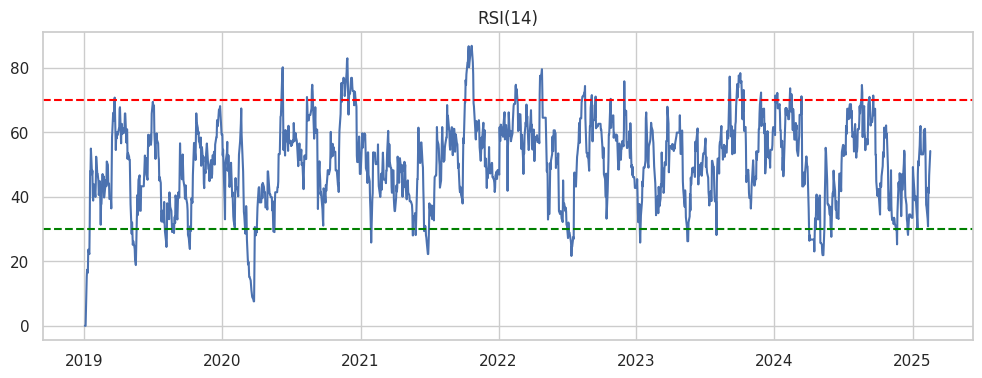

In [33]:
def compute_RSI(series, window=14): # Define a Function to Compute the Relative Strength Index (RSI)
    delta = series.diff() # Calculate the Difference between the Current and Previous Values in the Series
    up = delta.clip(lower=0) # Isolate Positive Changes (Upward Movements)
    down = -1 * delta.clip(upper=0) # Isolate Negative Changes (Downward Movements) and Make Them Positive
    ma_up = up.ewm(alpha=1/window, adjust=False).mean() # Calculate the Exponential Moving Average (EMA) of Upward Movements
    ma_down = down.ewm(alpha=1/window, adjust=False).mean() # Calculate the EMA of Downward Movements
    rs = ma_up / ma_down # Calculate the Relative Strength (RS)
    rsi = 100 - (100 / (1 + rs)) # Compute the Final RSI Value
    return rsi # Return the RSI Series

def compute_MACD(series, fast=12, slow=26, signal=9): # Define a Function to Compute the Moving Average Convergence Divergence (MACD)
    ema_fast = series.ewm(span=fast, adjust=False).mean() # Calculate the Fast EMA of the Series
    ema_slow = series.ewm(span=slow, adjust=False).mean() # Calculate the Slow EMA of the Series
    macd = ema_fast - ema_slow # Compute the MACD Line by Subtracting the Slow EMA from the Fast EMA
    signal_line = macd.ewm(span=signal, adjust=False).mean() # Calculate the Signal Line by Taking the EMA of the MACD Line
    hist = macd - signal_line # Compute the MACD Histogram by Subtracting the Signal Line from the MACD Line
    return macd, signal_line, hist # Return the MACD Line, Signal Line, and Histogram

stock_df_daily['RSI14'] = compute_RSI(stock_df_daily['Close']) # Compute the 14-day RSI and Store it in a New Column
stock_df_daily['MACD'], stock_df_daily['MACD_signal'], stock_df_daily['MACD_hist'] = compute_MACD(stock_df_daily['Close']) # Compute the MACD, Signal Line, and Histogram and Store Them in New Columns

plt.figure(figsize=(12,4)) # Create a Figure for the Plot with a Specified Size
plt.plot(stock_df_daily.index, stock_df_daily['RSI14'], label='RSI14') # Plot the RSI14 Series
plt.axhline(70, color='red', linestyle='--') # Add a Horizontal Line at Y=70 to Indicate the Overbought Threshold
plt.axhline(30, color='green', linestyle='--') # Add a Horizontal Line at Y=30 to Indicate the Oversold Threshold
plt.title('RSI(14)') # Set the Title of the Plot
plt.show() # Display the Final Plot

### Insight & Findings

1. Findings

  *   Overbought limit: above 70 (red dashed line) was often reached in 2020–2022.
  *   Oversold limit: below 30 (green dashed line) occurred at several points, including in early 2019 and during the 2023–2024 period.

2. Insight

  The RSI(14) chart shows fluctuations in relative price strength throughout the 2019–2025 period, with several instances of reaching the overbought area above 70 and the oversold area below 30. Overbought periods were quite frequent in 2020–2022, indicating excessive buying pressure during certain phases. Conversely, oversold areas also appeared periodically, signaling a potential price reversal due to high selling pressure.

3. Relevance

  The RSI indicator can help traders identify potential entry and exit points in the market. The overbought area can be a signal to consider selling or taking profits, while the oversold area can be a buy signal to capitalize on a potential price rebound.

In [34]:
add_insight(
    "The RSI(14) chart shows fluctuations in relative price strength throughout the 2019–2025 period, with several instances of reaching the overbought area above 70 and the oversold area below 30. Overbought periods were quite frequent in 2020–2022, indicating excessive buying pressure during certain phases. Conversely, oversold areas also appeared periodically, signaling a potential price reversal due to high selling pressure.",
    "Overbought limit: above 70 (red dashed line) was often reached in 2020–2022. Oversold limit: below 30 (green dashed line) occurred at several points, including in early 2019 and during the 2023–2024 period.",
    "The RSI indicator can help traders identify potential entry and exit points in the market. The overbought area can be a signal to consider selling or taking profits, while the oversold area can be a buy signal to capitalize on a potential price rebound."
)

# 6. Summarization

In [39]:
insight_findings_df.head(6)

,No.,Insight & Findings,Evidence,Relevance
0,1,Significant fluctuations in BNI's stock price ...,"Sharp decline in March 2020: from around ±4,00...",This insight is relevant for medium- and long-...
1,2,Although the total return during the analysis ...,Daily volatility: 2.11% → indicates that the d...,This data is important for investors who consi...
2,3,A very sharp surge in volatility is visible in...,The highest peak of the 30-day annualized roll...,This information is important for short- and m...
3,4,The analysis shows a pattern of monthly fluctu...,March 2020: -45.62% → the largest decline in t...,This pattern can be used by seasonal traders t...
4,5,The data shows the top three best and worst mo...,"Top months: October 2021: +30.23%, November 20...",This information can help traders and investor...
5,6,The RSI(14) chart shows fluctuations in relati...,Overbought limit: above 70 (red dashed line) w...,The RSI indicator can help traders identify po...


In [37]:
# Initialize an Empty String to Store All Insights and Findings Text
full_text = ""

# Iterate Through Each Row in the DataFrame insight_findings_df
for idx, row in insight_findings_df.iterrows():
    # Append Formatted Insight, Evidence, and Relevance to full_text With New Lines
    full_text += f"Insight: {row['Insight & Findings']}\nEvidence: {row['Evidence']}\nRelevance: {row['Relevance']}\n\n"

# Create a Prompt String Containing Instructions and Requirements for the Structured Summary
prompt = f"""
From the following collection of insights:

{full_text}

Please create a structured summary following these requirements:

1. Categorize the insights into key points from the perspective of specific stakeholders:
   - Investor
   - Risk Manager
   - Trader
2. For each stakeholder category, provide detailed, lengthy, and complex explanations.
   Include context, interpretation, and possible strategic implications arising from these insights.
3. After listing the points for each stakeholder, provide a single comprehensive concluding paragraph
   that synthesizes all findings into a coherent narrative, maintaining a professional and analytical tone.
4. Where possible, use financial and market technical terms, but also clarify them if the terminology
   could be ambiguous to some readers.
5. Keep the discussion strictly within the scope of the provided insights and avoid digressing into unrelated topics.

Final output format:
- Section 1: Investor
- Section 2: Risk Manager
- Section 3: Trader
- Section 4: Conclusion
"""

# Invoke the Output Generation Method With the Given Prompt and Parameters
summary_response = output.invoke(
    input=prompt,
    max_tokens=3000,
    temperature=0.7,
)

# Combine All Parts of the Summary Response into a Single String
summary_text = "".join(summary_response)

# Print a Header to Indicate the Start of the Summary Output
print("=== Insight & Findings Summaries ===")

# Print the Generated Structured Summary Text
print(summary_text)

=== Insight & Findings Summaries ===
- Section 1: Investor

Investors, particularly those with a medium- to long-term perspective, should note the following insights:

1. **Stock Price Fluctuations and Trends**: BNI's stock experienced significant price swings from 2019 to early 2025, marked by three major uptrends (early 2021–mid-2023, mid-2023–early 2024, and a sharp rise in early 2024 before a decline). These trends were accompanied by notable SMA20 and SMA50 crossovers—golden crosses indicating potential bullish momentum and death crosses suggesting bearish signals. Investors should be aware that despite a positive total return of 3.86% over the period, the annualized return was only 0.62%, suggesting relatively slow growth.

2. **Risk Assessment**: The stock's high volatility, with an annualized volatility of 33.55%, indicates substantial price fluctuations year over year. Moreover, the max drawdown of -69.71% and the longest drawdown period of 786 days highlight significant risks

# **Summaries & Conclusion from Granite-3.3-8B-Instruct Model**
- Section 1: Investor

  Investors, particularly those with a medium- to long-term perspective, should note the following insights:

  1. **Stock Price Fluctuations and Trends**: BNI's stock experienced significant price swings from 2019 to early 2025, marked by three major uptrends (early 2021–mid-2023, mid-2023–early 2024, and a sharp rise in early 2024 before a decline). These trends were accompanied by notable SMA20 and SMA50 crossovers—golden crosses indicating potential bullish momentum and death crosses suggesting bearish signals. Investors should be aware that despite a positive total return of 3.86% over the period, the annualized return was only 0.62%, suggesting relatively slow growth.

  2. **Risk Assessment**: The stock's high volatility, with an annualized volatility of 33.55%, indicates substantial price fluctuations year over year. Moreover, the max drawdown of -69.71% and the longest drawdown period of 786 days highlight significant risks associated with BNI's stock. Investors need to carefully consider these risk factors, especially if employing a passive, buy-and-hold strategy, as the long recovery periods from drawdowns imply prolonged periods of underperformance.

  3. **Seasonal Patterns**: Analyzing monthly performance reveals distinct patterns, with some months, like March 2020 and May, historically showing large negative movements, while others, like January and November, tend to have positive outcomes. Such seasonal tendencies can help investors anticipate periods of higher volatility or trend direction, allowing for more informed decision-making regarding entry and exit points.

- Section 2: Risk Manager

  Risk managers should consider the following insights to assess and mitigate potential risks:

  1. **Volatility Analysis**: The sharp surge in volatility during the COVID-19 pandemic's onset (March–April 2020, reaching nearly 100% annualized) underscores the stock's susceptibility to extreme market events. Although volatility decreased thereafter, it remained elevated at 20–40% from 2021 to 2023, rising again towards the end of 2024 to early 2025. Risk managers must account for this volatility when setting stop-loss levels, position sizing, and employing hedging strategies to protect against significant adverse price movements.

  2. **Drawdown and Recovery**: The max drawdown of -69.71% and the longest drawdown period of 786 days signify substantial risk exposure. Risk managers should evaluate BNI's stock within the context of a diversified portfolio to ensure that the inclusion of this asset does not unduly increase overall portfolio risk. Strategies like stop-loss orders, hedging, and portfolio rebalancing can help mitigate the impact of potential large drawdowns.

  3. **RSI Indicator**: The RSI(14) chart's frequent overbought signals (above 70) in 2020–2022 indicate periods of excessive buying pressure, potentially leading to price corrections. Risk managers can use this information to set appropriate risk parameters and monitor market conditions that might trigger such corrections, allowing for timely adjustments to risk mitigation strategies.

- Section 3: Trader

  For traders, the insights offer specific actionable signals and risk management considerations:

  1. **Technical Signals**: Golden and death crosses between SMA20 and SMA50 can be used as entry and exit signals for medium-term trades. Traders should be vigilant about these crossovers to capitalize on potential trend changes, understanding that these signals can be false positives and should be corroborated with other technical indicators or fundamental analysis.

  2. **Volatility-Based Trading**: Traders should monitor the 30-day annualized rolling volatility for opportunities arising from periods of high volatility, which may present increased profit potential but also heightened risk. Volatility clustering, where periods of high volatility tend to be followed by more high volatility, can be leveraged by traders using strategies like straddles or strangles.

  3. **Seasonal and Monthly Patterns**: Identifying months with historically extreme performance (both positive and negative) can inform trading strategies. For instance, traders might avoid or increase positions in months prone to large declines (like March) and seek to capitalize on months with consistently positive performance (like January).

- Section 4: Conclusion

  In summary, the insights provide a multifaceted view of BNI's stock performance from 2019 to early 2025, catering to the diverse needs of investors, risk managers, and traders. Investors should weigh the slow annualized return against the stock's volatility and drawdown risks, considering seasonal patterns to inform their long-term strategy. Risk managers must address high volatility and significant drawdown risks through appropriate hedging and portfolio management techniques. Traders can utilize technical signals, volatility analysis, and seasonal patterns to optimize their entry and exit points, managing risk through informed position sizing and stop-loss mechanisms. Overall, a comprehensive understanding of these insights allows stakeholders to make more informed decisions, aligning their strategies with BNI's stock behavior and market conditions.

# Recommendation

## 1. For Investor

- **Adjust Portfolio Weighting**

  Reduce the proportion of BNI in the portfolio if it's currently too large, given the annualized return of only 0.62% and significant drawdowns. Target a maximum of 5–8% of the total portfolio to mitigate the impact of single-stock risk.

- **Seasonal Entry/Exit Strategy**

  Use historically positive periods (January, November) to accumulate positions, and consider reducing exposure before months with historically negative performance (March, May).

- **Dividend Capture**

  If BNI has a stable dividend schedule, use a dividend capture strategy ahead of the ex-date, but limit the holding period to avoid long-term volatility.

- **Gradual Scaling**

  Make gradual purchases (dollar-cost averaging) when the price is in an undervalued area based on historical P/E and P/B ratios, combined with SMA golden cross signals.



## 2. For Risk Manager

- **Implement Dynamic Stop-Loss Levels**

  Implement an adaptive stop-loss adjusted to current volatility. For example, if the ATR (Average True Range) is high, use a wider stop-loss distance (2–3x ATR) to avoid being hit by market noise.

- **Hedging with Index Futures or Options**

  Use IHSG (Indonesia Composite Index) futures contracts or financial sector stock options to hedge the portfolio during periods of high volatility, especially if rolling volatility is > 40%.

- **Drawdown Monitoring System**

  Set up an alert system if a drawdown exceeds 20% from the last price peak. This will trigger a re-evaluation of the position and potential for quick risk adjustments.

- **Position Sizing Formula**

  Apply a fixed risk-based position sizing (e.g., a maximum of 1–2% risk of capital per position) to minimize cumulative losses from extreme volatility.

## 3. For Trader

- **Crossover Confirmation**

  Combine the SMA20-SMA50 golden/death cross with volume and RSI indicators to confirm entry/exit signals. Don't enter a position based on a single crossover alone.

- **Volatility Exploitation**

  When volatility is above 50%, use options strategies like straddles/strangles to capitalize on large price movements without a definite direction.

- **Seasonal Swing Trades**

  Enter positions before January and November, with an exit target in the middle of the month, based on historically positive patterns. Avoid opening large positions before March or May.

- **Intraday Volatility Scalping**

  Use Bollinger Bands and intraday volatility indicators to find scalping opportunities of 0.5–1.5% when the price hits the upper or lower bands, especially on days with major news releases or earnings.